## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on housing sale price prediction. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time.


### Housing Sale Price Prediction

You can download the csv files from the project folder on Canvas. <br>

#### Context

There can be tons of reasons that affect the price of a house. This project aims to predict the final price of each home `SalePrice`. <br>

#### Variables: Brief Description

SalePrice - the property"s sale price in dollars: the target variable to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>


### Module 1: Data Exploration

Load `housing_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 _ IQR or larger than Q3 + 2.5 _ IQR.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
sns.set_palette("pastel")
colorSet = sns.color_palette("Set1", 10)


#### Data loading


In [3]:
df = pd.read_csv("housing_train.csv", index_col="Id").sort_index()
print(f"Data shape: {df.shape}")


Data shape: (1200, 80)


#### Missing data


In [4]:
nanCount = df.isna().sum()
nanCount[nanCount != 0]


LotFrontage      211
Alley           1129
MasVnrType         6
MasVnrArea         6
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      575
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
PoolQC          1194
Fence            974
MiscFeature     1158
dtype: int64

#### Data imputation


Missing object data (categorical data) are filled with NA.


In [5]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].fillna("NA")


#### Data removal


Missing numerical data are removed.


In [6]:
df = df.dropna()


#### Outliner removal


In [7]:
Q1 = df.quantile(q=0.25, numeric_only=True)
Q3 = df.quantile(q=0.75, numeric_only=True)
IQR = Q3 - Q1
lBound = Q1 - 2.5 * IQR
hBound = Q3 + 2.5 * IQR

adjDf = df[~(df.lt(lBound) | df.gt(hBound)).any(axis=1)]
print(f"Data shape: {adjDf.shape}")


Data shape: (466, 80)


#### Summary


In [8]:
print(f"After missing values removal, the shape of the dataset was {df.shape[0]} rows by {df.shape[1]} columns")
print(f"After outliners removal, the shape of the dataset was {adjDf.shape[0]} rows by {adjDf.shape[1]} columns")


After missing values removal, the shape of the dataset was 920 rows by 80 columns
After outliners removal, the shape of the dataset was 466 rows by 80 columns


-   Missing values are filled.
-   Extreme outliers with IOR > 2.5 are removed.


In [9]:
print(f"{nanCount.sum()} observations are removed or filled due to missingness, and {df.shape[0]} observations remain for further analysis.")
print(f"{df.shape[0] - adjDf.shape[0]} observations are removed due to outlining, and {adjDf.shape[0]} observations remain for further analysis.")


5750 observations are removed or filled due to missingness, and 920 observations remain for further analysis.
454 observations are removed due to outlining, and 466 observations remain for further analysis.


### Module 2: Data Visualization

What are the distributions of variables? Are the variables distributed differently in the high-price group (i.e. > 300,000) versus the low-price group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that variables a, b, c have similar patterns.


#### Divided dataset into 2 groups base on Sale Price


In [10]:
adjDf.insert(len(adjDf.columns), "HighPrice", adjDf["SalePrice"].gt(300000))
hpGroup = adjDf[adjDf["HighPrice"]]
lpGroup = adjDf[~adjDf["HighPrice"]]


#### Compare Lot Area of two price group


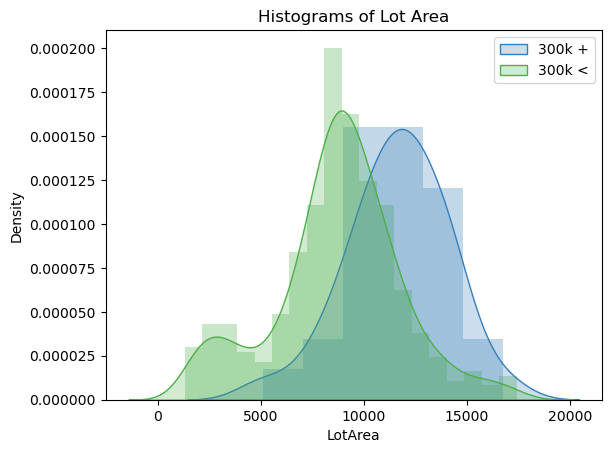

In [11]:
sns.histplot(hpGroup["LotArea"], stat="density", alpha=0.3, color=colorSet[1], linewidth=0)
sns.histplot(lpGroup["LotArea"], stat="density", alpha=0.3, color=colorSet[2], linewidth=0)

sns.kdeplot(hpGroup["LotArea"], fill=True, color=colorSet[1])
sns.kdeplot(lpGroup["LotArea"], fill=True, color=colorSet[2])

plt.legend(labels=["300k +", "300k <"])
plt.title("Histograms of Lot Area")
print()


High Price group tends to have larger size in Lot Area.


#### Compare Built Years of two price group


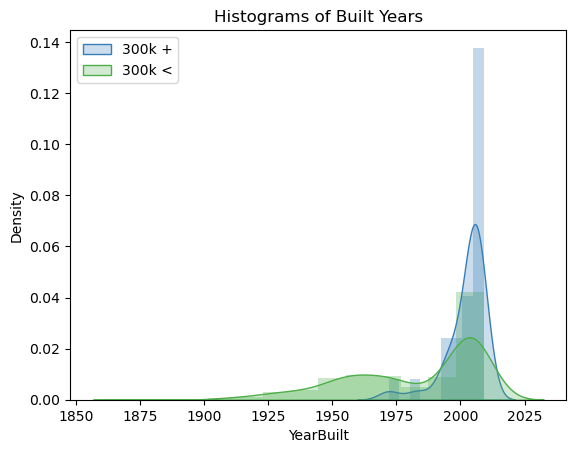

In [12]:
sns.histplot(hpGroup["YearBuilt"], stat="density", alpha=0.3, color=colorSet[1], linewidth=0)
sns.histplot(lpGroup["YearBuilt"], stat="density", alpha=0.3, color=colorSet[2], linewidth=0)

sns.kdeplot(hpGroup["YearBuilt"], fill=True, color=colorSet[1])
sns.kdeplot(lpGroup["YearBuilt"], fill=True, color=colorSet[2])

plt.legend(labels=["300k +", "300k <"])
plt.title("Histograms of Built Years")
print()


High Price group tends to be newer in Year Built.


#### Box plot of OverallQual against SalePrice


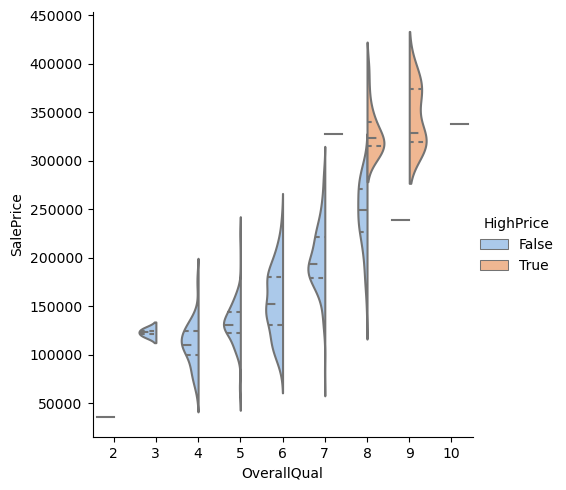

In [13]:
sns.catplot(data=adjDf, x="OverallQual", y="SalePrice", hue="HighPrice", kind="violin", split=True, inner="quartile")
print()


High Price group tends to have better Overall Quality.


#### Joint distributions on OverallQual and OverallCond against HighPrice


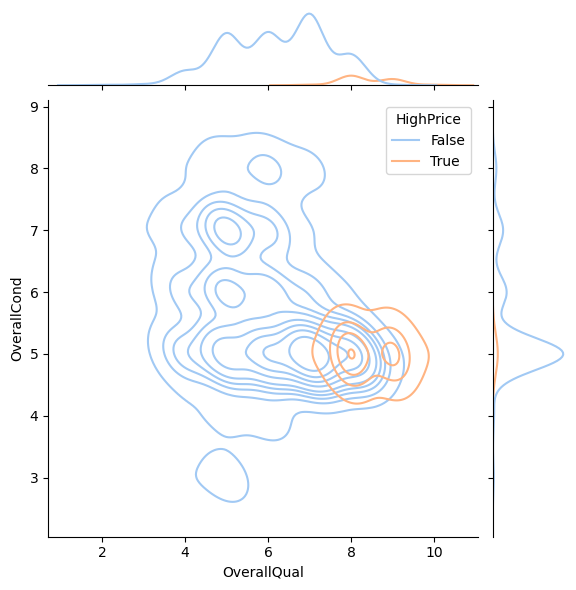

In [14]:
sns.jointplot(data=adjDf, x="OverallQual", y="OverallCond", hue="HighPrice", kind='kde')
print()


High Price group tends to have better Overall Quality and Overall Condition.


#### Pair Plot of Lot Area, Total Basement Area, 1st Floor Area, Garage Area, Pool Area with High Price


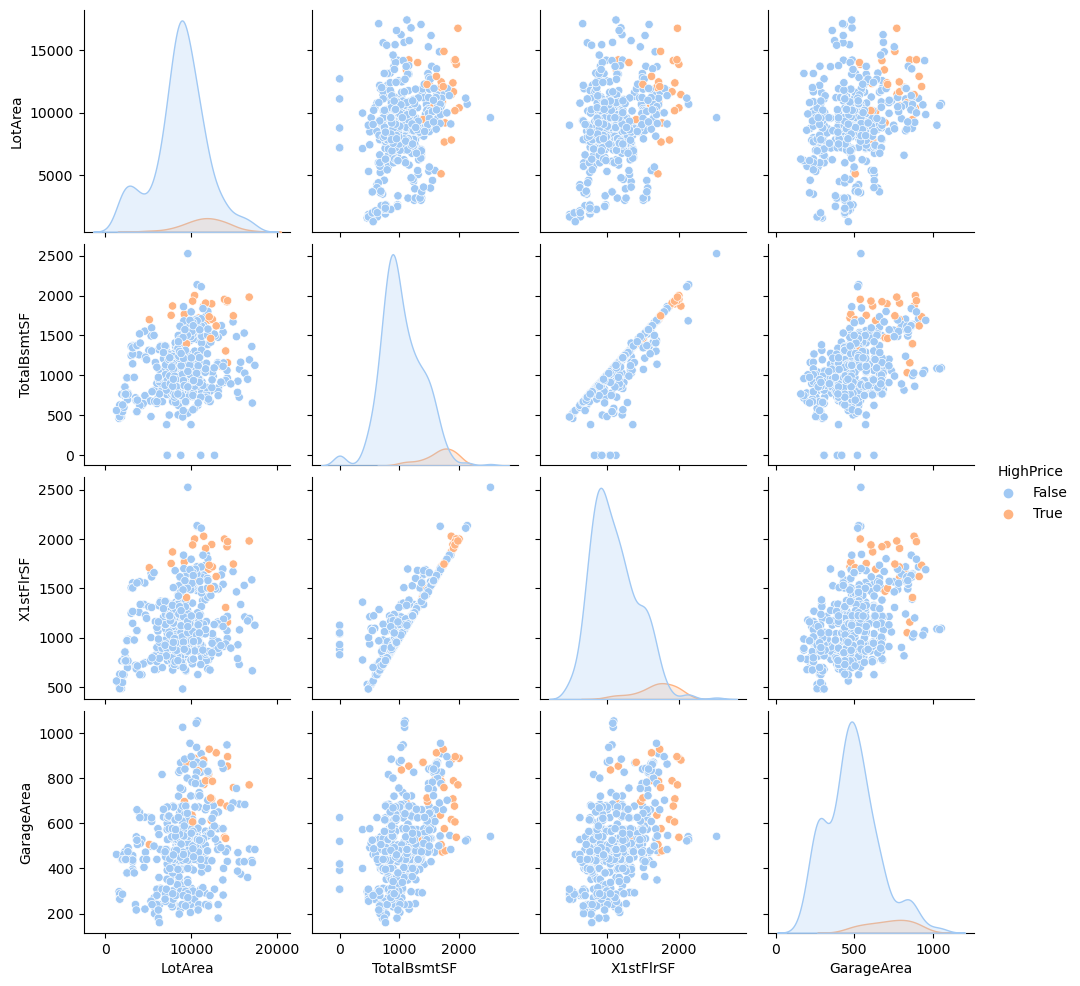

In [15]:
sns.pairplot(adjDf[["LotArea", "TotalBsmtSF", "X1stFlrSF", "GarageArea", "HighPrice"]], hue="HighPrice", palette="pastel")
print()


Lot Area, Total Basement Area, 1st Floor Area and Garage Area are correleatied with High Price group tends to have larger size in different aspect.


### Module 3: Dimension Reduction

Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.


In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA


In [17]:
PcaDf = adjDf.copy(deep=True)

for col in PcaDf.columns:
    if PcaDf[col].dtype == object:
        PcaDf[col] = OrdinalEncoder().fit_transform(PcaDf[[col]])


In [18]:
xTrain = PcaDf.drop("SalePrice", axis=1).drop("HighPrice", axis=1)
yTrain = PcaDf["SalePrice"]


In [19]:
model = PCA(n_components=2, whiten=True)
model.fit(xTrain)
X_2D = model.transform(xTrain)

PcaDf.insert(len(PcaDf.columns), "PCA1", X_2D[:, 0])
PcaDf.insert(len(PcaDf.columns), "PCA2", X_2D[:, 1])


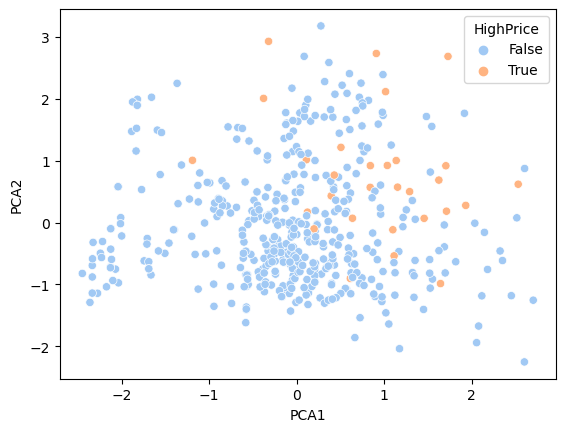

In [20]:
sns.scatterplot(data=PcaDf, x="PCA1", y="PCA2", hue='HighPrice')
print()


### Module 4: Regression and Prediction

Choose three regression methods and build regression models based on data from `housing_train.csv`, using 5-fold cross-validation. <br>

Further, load `housing_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the mean squared error. Which houses have the worst prediction and what are their characteristics? <br>

Note: we don"t deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [22]:
def getYScore(yTrain, yTrainPred, yTest, yTestPred):
    trainR2 = r2_score(yTrain, yTrainPred)
    testR2 = r2_score(yTest, yTestPred)
    trainRMSE = mean_squared_error(yTrain, yTrainPred, squared=False)
    testRMSE = mean_squared_error(yTest, yTestPred, squared=False)
    return (trainR2, testR2, trainRMSE, testRMSE)


In [23]:
def printYScoreSet(R2, RMSE, name, mode):
    print(f"{mode}ing R-square: {R2}.")
    print(f"The {mode}ing RMSE of the {name} Regression is {RMSE}.")


In [24]:
def printYScore(trainR2, testR2, trainRMSE, testRMSE, name, alpha=None):
    if alpha:
        print(f"Best lambda for the {name} Regression is {alpha}.")
    printYScoreSet(trainR2, trainRMSE, name, "Train")
    printYScoreSet(testR2, testRMSE, name, "Test")
    print()


In [25]:
def printWorstPred(yTest, yTestPred, df):
    errAbs = abs(yTest - yTestPred).to_frame()
    worstPred = errAbs["SalePrice"].max()
    worstID = errAbs["SalePrice"].idxmax()

    print(f"Worst Predicted House ID {worstID} with absolute error {worstPred}.")
    print("With following characteristic:")
    print(df.loc[[worstID]].squeeze())
    print()

    return worstID


In [26]:
def plotPredXY(yTrain, yTrainPred, yTest, yTestPred):
    ax = plt.gca()
    plt.plot([0, 1], [0, 1], transform=ax.transAxes, color="red")
    plt.scatter(yTrain, yTrainPred)
    plt.scatter(yTest, yTestPred)
    plt.show()


In [27]:
def plotPredViolin(yTrain, yTrainPred, yTest, yTestPred):
    err1 = pd.DataFrame({'Train': abs(yTrain - yTrainPred)}).melt()
    err2 = pd.DataFrame({'Test': abs(yTest - yTestPred)}).melt()
    err = pd.concat([err1, err2]).reset_index(drop=True)

    sns.violinplot(data=err, x="variable", y="value", hue="variable", inner="quartile")
    plt.ylabel("Error")
    plt.xlabel("")


In [28]:
def plotRMSE(alpha, trainErr, testErr):
    plt.semilogx(alpha, trainErr, label="Train RMSE")
    plt.semilogx(alpha, testErr, label="Test RMSE")
    plt.legend()


In [29]:
def plotCoefLambda(alpha, coef, bestAlpha):
    plt.figure()
    plt.plot(alpha, coef)
    plt.xscale("log")

    plt.xlabel("Lambda")
    plt.ylabel("Standardized Coefficients")
    plt.axvline(x=bestAlpha, color='red', linewidth=1)


In [30]:
test = pd.read_csv("housing_test.csv", index_col="Id").sort_index()
adjTest = test.copy(deep=True)

for col in adjTest.columns:
    if adjTest[col].dtype == object:
        adjTest[col] = adjTest[col].fillna("NA")
        adjTest[col] = OrdinalEncoder().fit_transform(adjTest[[col]])


In [31]:
adjTest = adjTest.dropna()
xTest = adjTest.drop("SalePrice", axis=1)
yTest = adjTest["SalePrice"]


#### Multiple linear regression


In [32]:
model = LinearRegression()
scores = cross_val_score(model, xTrain, yTrain, scoring='r2', cv=5)
print(f"Score for CV {scores}")


Score for CV [0.90460633 0.90626172 0.87255707 0.88935132 0.82022   ]


In [33]:
model.fit(xTrain, yTrain)

yTrainPred = model.predict(xTrain)
yTestPred = model.predict(xTest)

lrTrainR2, lrTestR2, lrTrainRMSE, lrTestRMSE = getYScore(yTrain, yTrainPred, yTest, yTestPred)


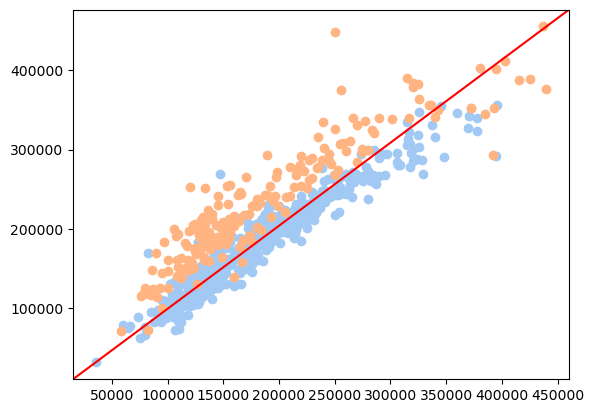

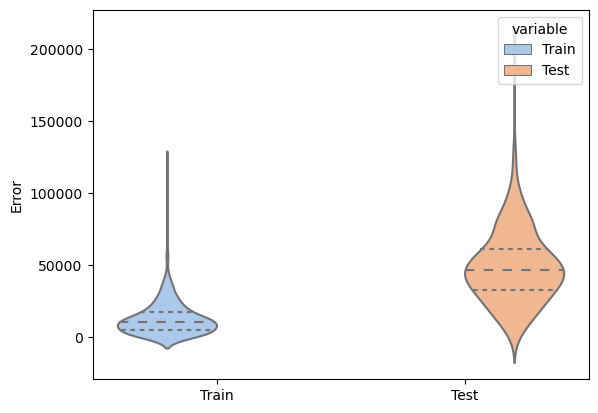

In [34]:
plotPredXY(yTrain, yTrainPred, yTest, yTestPred)
plotPredViolin(yTrain, yTrainPred, yTest, yTestPred)


In [35]:
printYScore(lrTrainR2, lrTestR2, lrTrainRMSE, lrTestRMSE, "Linear")
worstLrID = printWorstPred(yTest, yTestPred, test)


Training R-square: 0.9175750410361199.
The Training RMSE of the Linear Regression is 18408.0746005529.
Testing R-square: 0.5455794849089886.
The Testing RMSE of the Linear Regression is 55770.73699368779.

Worst Predicted House ID 1387 with absolute error 197581.24041335937.
With following characteristic:
MSSubClass           60
MSZoning             RL
LotFrontage        80.0
LotArea           16692
Street             Pave
                  ...  
MoSold                7
YrSold             2006
SaleType             WD
SaleCondition    Normal
SalePrice        250000
Name: 1387, Length: 80, dtype: object



#### Ridge Regression


In [36]:
alpha = pow(10, np.linspace(-5, 10, 500))
coef = []
trainErr = []
testErr = []


In [37]:
for i in alpha:
    ridgeSig = RidgeCV(cv=5, alphas=[i]).fit(xTrain, yTrain)
    coef.append(ridgeSig.coef_)
    trainErr.append(mean_squared_error(yTrain, ridgeSig.predict(xTrain), squared=False))
    testErr.append(mean_squared_error(yTest, ridgeSig.predict(xTest), squared=False))

ridgeBest = RidgeCV(cv=5, alphas=alpha).fit(xTrain, yTrain)
bestAlpha = ridgeBest.alpha_

yTrainPred = ridgeBest.predict(xTrain)
yTestPred = ridgeBest.predict(xTest)

ridgeTrainR2, ridgeTestR2, ridgeTrainRMSE, ridgeTestRMSE = getYScore(yTrain, yTrainPred, yTest, yTestPred)


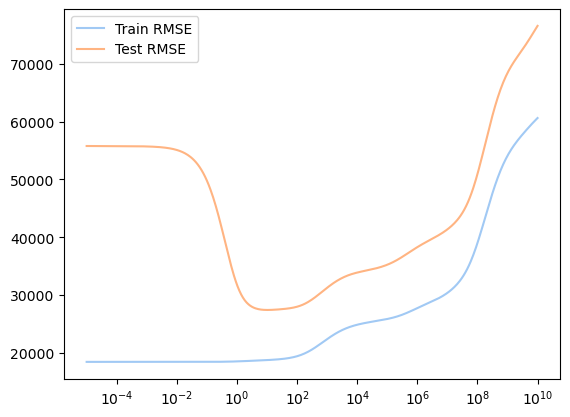

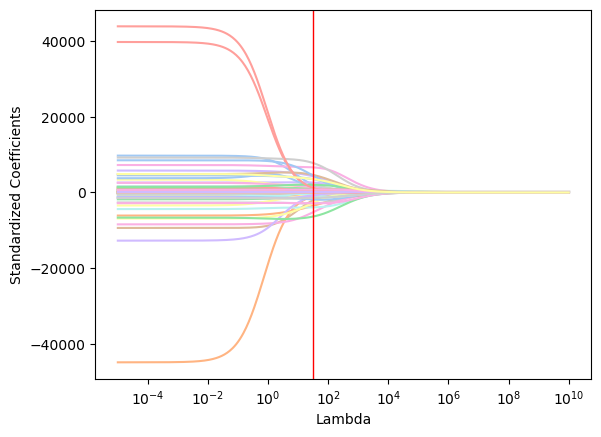

In [38]:
plotRMSE(alpha, trainErr, testErr)
plotCoefLambda(alpha, coef, bestAlpha)


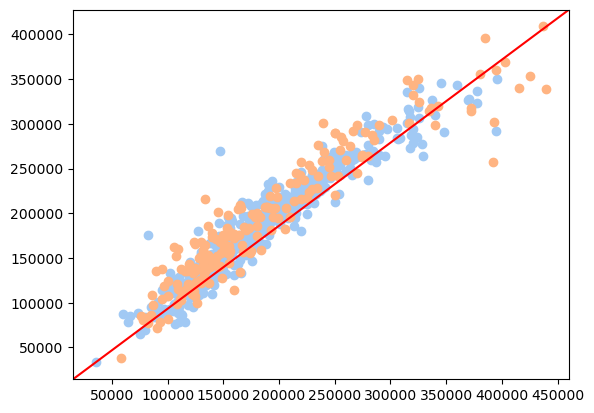

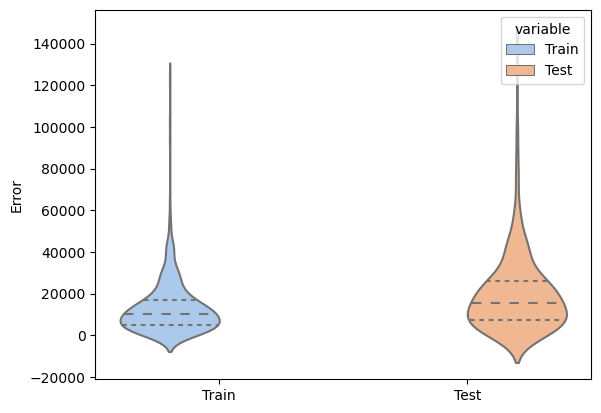

In [39]:
plotPredXY(yTrain, yTrainPred, yTest, yTestPred)
plotPredViolin(yTrain, yTrainPred, yTest, yTestPred)


In [40]:
printYScore(ridgeTrainR2, ridgeTestR2, ridgeTrainRMSE, ridgeTestRMSE, "Ridge", bestAlpha)
worstRidgeID = printWorstPred(yTest, yTestPred, test)


Best lambda for the Ridge Regression is 31.116158278243567.
Training R-square: 0.913061375090016.
The Training RMSE of the Ridge Regression is 18905.378612272645.
Testing R-square: 0.8892479386106369.
The Testing RMSE of the Ridge Regression is 27532.986888780684.

Worst Predicted House ID 689 with absolute error 135126.61229397124.
With following characteristic:
MSSubClass            20
MSZoning              RL
LotFrontage         60.0
LotArea             8089
Street              Pave
                  ...   
MoSold                10
YrSold              2007
SaleType             New
SaleCondition    Partial
SalePrice         392000
Name: 689, Length: 80, dtype: object



#### Lasso Regression


In [41]:
alpha = pow(10, np.linspace(-5, 10, 500))
coef = []
trainErr = []
testErr = []


In [42]:
for i in alpha:
    lassoSig = LassoCV(cv=5, alphas=[i], max_iter=pow(2, 20)).fit(xTrain, yTrain)
    coef.append(lassoSig.coef_)
    trainErr.append(mean_squared_error(yTrain, lassoSig.predict(xTrain), squared=False))
    testErr.append(mean_squared_error(yTest, lassoSig.predict(xTest), squared=False))

lassoBest = LassoCV(cv=5, alphas=alpha).fit(xTrain, yTrain)
bestAlpha = lassoBest.alpha_

yTrainPred = lassoBest.predict(xTrain)
yTestPred = lassoBest.predict(xTest)

lassoTrainR2, lassoTestR2, lassoTrainRMSE, lassoTestRMSE = getYScore(yTrain, yTrainPred, yTest, yTestPred)


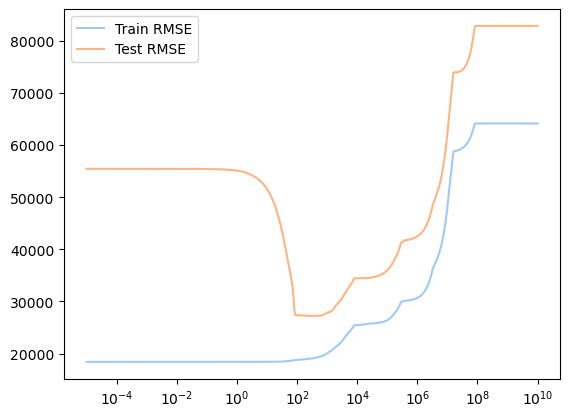

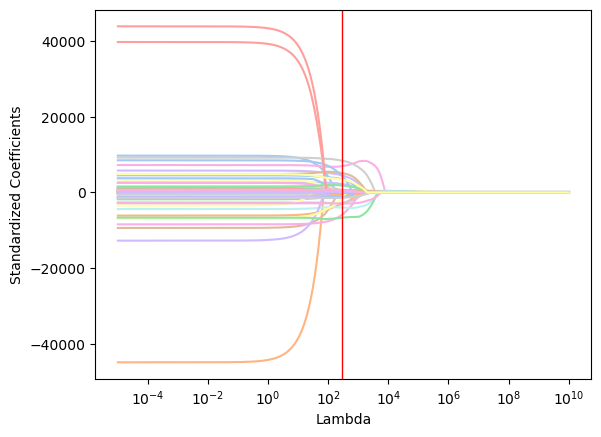

In [43]:
plotRMSE(alpha, trainErr, testErr)
plotCoefLambda(alpha, coef, bestAlpha)


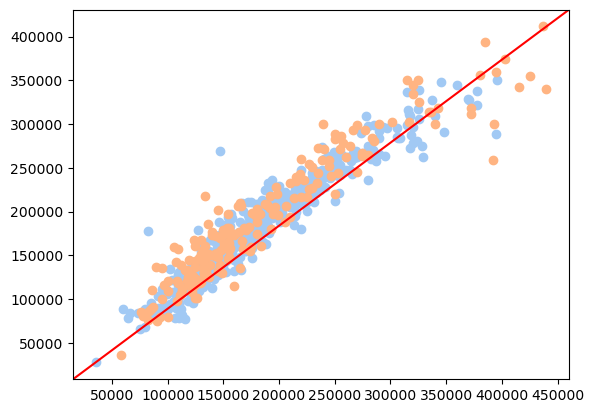

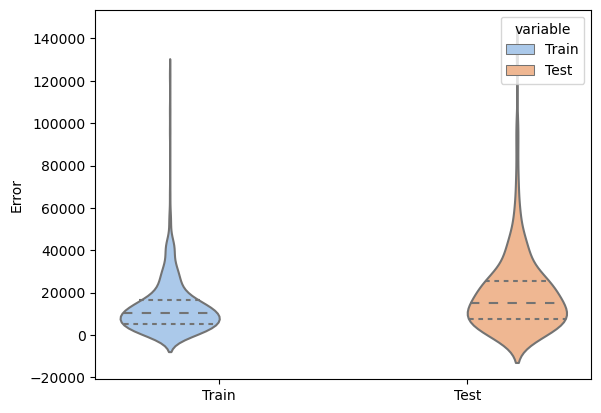

In [44]:
plotPredXY(yTrain, yTrainPred, yTest, yTestPred)
plotPredViolin(yTrain, yTrainPred, yTest, yTestPred)


In [45]:
printYScore(lassoTrainR2, lassoTestR2, lassoTrainRMSE, lassoTestRMSE, "Lasso", bestAlpha)
worstLassoID = printWorstPred(yTest, yTestPred, test)


Best lambda for the Lasso Regression is 285.04263208534314.
Training R-square: 0.9118991877757072.
The Training RMSE of the Lasso Regression is 19031.321767056714.
Testing R-square: 0.8918065958919904.
The Testing RMSE of the Lasso Regression is 27213.087083298095.

Worst Predicted House ID 689 with absolute error 132645.6271754927.
With following characteristic:
MSSubClass            20
MSZoning              RL
LotFrontage         60.0
LotArea             8089
Street              Pave
                  ...   
MoSold                10
YrSold              2007
SaleType             New
SaleCondition    Partial
SalePrice         392000
Name: 689, Length: 80, dtype: object



### Module 5: Summary

Summarize your findings and draw conclusions.


In [46]:
printYScoreSet(lrTrainR2, lrTrainRMSE, "Linear", "Train")
printYScoreSet(lrTestR2, lrTestRMSE, "Linear", "Test")
print(f"Worst Predicted House ID {worstLrID}.\n")

printYScoreSet(ridgeTrainR2, ridgeTrainRMSE, "Ridge", "Train")
printYScoreSet(ridgeTestR2, ridgeTestRMSE, "Ridge", "Test")
print(f"Worst Predicted House ID {worstRidgeID}.\n")

printYScoreSet(lassoTrainR2, lassoTrainRMSE, "Lasso", "Train")
printYScoreSet(lassoTestR2, lassoTestRMSE, "Lasso", "Test")
print(f"Worst Predicted House ID {worstLassoID}.\n")


Training R-square: 0.9175750410361199.
The Training RMSE of the Linear Regression is 18408.0746005529.
Testing R-square: 0.5455794849089886.
The Testing RMSE of the Linear Regression is 55770.73699368779.
Worst Predicted House ID 1387.

Training R-square: 0.913061375090016.
The Training RMSE of the Ridge Regression is 18905.378612272645.
Testing R-square: 0.8892479386106369.
The Testing RMSE of the Ridge Regression is 27532.986888780684.
Worst Predicted House ID 689.

Training R-square: 0.9118991877757072.
The Training RMSE of the Lasso Regression is 19031.321767056714.
Testing R-square: 0.8918065958919904.
The Testing RMSE of the Lasso Regression is 27213.087083298095.
Worst Predicted House ID 689.



From observation from the dataset and diagrams, the Sale Price is co-related with Lot Area, Built Year, Quality and Condition of the House, Total Basement Area, 1st Floor Area and Garage Area.

Besides that, three regression models were used: Multiple linear regression, Ridge regression, and Lasso regression. R-square and Root Mean Square Error (RMSE) were used to compare different models. The higher the R-square, the better the model was, and vice-versa. The lower the RMSE, the better the model was, and vice-versa.

For Multiple linear regression, although the training R-square was 0.91756 and the training RMSE was 18408, the highest training R-square and the lowest training RMSE, respectively. However, the testing R-square only was 0.54558, and the testing RMSE only was 55770, which has the worst result. Most likely, this model was overfitted, thus yielding a result that has low training error but high testing error.

For Ridge regression, the training R-square was 0.91306, and the training RMSE was 18905. The testing R-square was 0.88924, and the testing RMSE was 27532.

For Lasso regression, the training R-square was 0.91190, and the training RMSE was 19031. The testing R-square was 0.89181, and the testing RMSE was 27213, which has the best result with the highest testing R-square and lowest testing RMSE.

Thus, we should choose Lasso regression to build this dataset's regression model.
